# Network Notes

In [1835]:
# good 160 unit *3 network
network_model = "func-21-5-3"
iter1 = 360
iter2 = 1490
codec = 3200
model_type = 'functional'
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



wrote frames:  200 
saving config 
Training Iteration 141 
using full set of frames 
Training Iteration 142 
using full set of frames 
Training Iteration 143 
using full set of frames 
Training Iteration 144 
using full set of frames 
Training Iteration 145 
using full set of frames 

30600/48451 [=================>............] - ETA: 227s - loss: 32.5453 - main_output_loss: 26.8524 - mid_output_loss: 28.4646'


In [1836]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  140
num_iterations :  1200
fit_batch_size :  100
learn_next_step :  True
gen_every_nth :  10
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
seed_seq_len :  100
seq_step :  100
test_data_fn :  ./test/criticalpracticalreason.c2-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1000.0, 1000.0, 1000.0, 700.0, 600.0, 500.0, 400.0, 300.0, 200.0, 100.0, 60.0, 31.0, 16.0]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-21-5-3/model-140.h5
frame_len_ms :  20


In [1837]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-21-5-3 Notes

2017-11-29 07:52:54

Run with arguments --load-weights=out/func-21-5-1 ./test/criticalpracticalreason.c2-3200

## Description

Try long corpus with weights from short corpus, since there was a failure training directly


In [1838]:
if model_type != 'functional':
  nd.model_config(network_model)

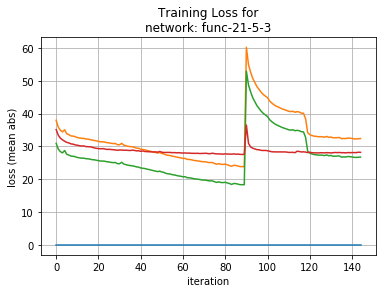

In [1839]:
nd.plot_training_loss(network_model, 'mean abs') 

In [1840]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    print(str.join("",f.readlines()[-10:]))

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

0,32.3669683294,26.7483048921,28.0933167681
0,32.4357674186,26.8157084474,28.1002944374
0,32.3985075428,26.7887213375,28.0489306084
0,32.5691545785,26.9434892999,28.1283259735
0,32.4975901004,26.8767137721,28.104381223
0,32.4406935313,26.815084373,28.1280453724
0,32.2981584719,26.6746918935,28.1173324731
0,32.2898656518,26.6655368601,28.1216435395
0,32.3467715548,26.6987003544,28.240355581
0,32.4105037847,26.7697991374,28.203522816

140


Latest Iteration: 140
3200 rate codec



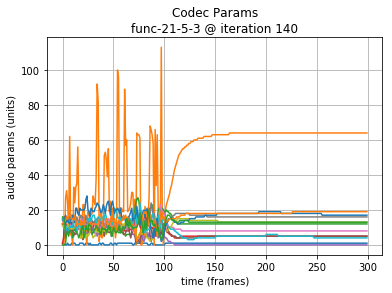

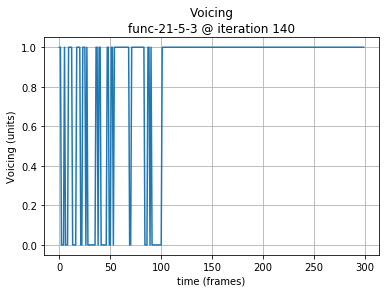

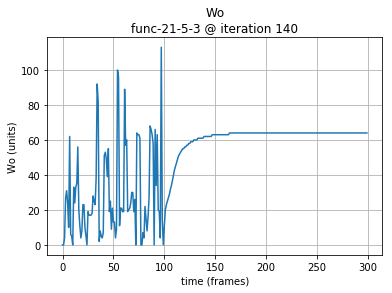

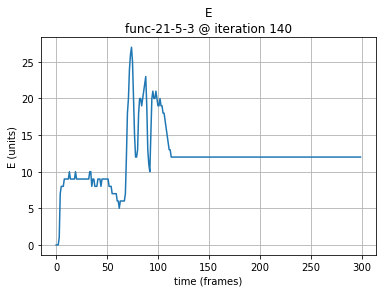

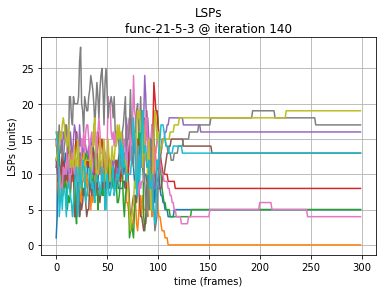

In [1841]:
try:
  print("Latest Iteration:", latest_iter)
  nd.plot_codec_params(network_model,latest_iter, scale_up='orig')
  nd.plot_spec_params(network_model,latest_iter, params='Voicing')
  nd.plot_spec_params(network_model,latest_iter, params='Wo')
  nd.plot_spec_params(network_model,latest_iter, params='E')
  nd.plot_spec_params(network_model,latest_iter, params='LSPs')
except FileNotFoundError:
    print("File not found")

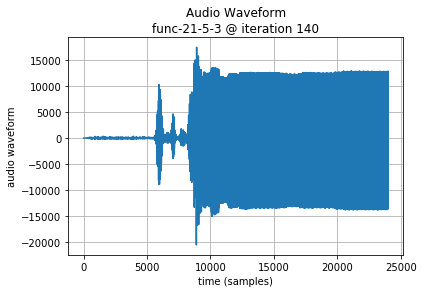

In [1842]:
#print(latest_iter)
#print(home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav")
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)
#print(home + "/store/c2gen/c2towav.sh", cb)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, latest_iter)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

In [1843]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-21-5-3/out-c2cb-360'

In [ ]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+codec_sub+".wav"))